In [ ]:
import tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
!unzip /content/drive/MyDrive/dataset.zip

Archive:  /content/drive/MyDrive/dataset.zip
replace dataset/dataset/readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: No


In [ ]:
train_ds = train_datagen.flow_from_directory('/content/dataset/dataset/train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('/content/dataset/dataset/test_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')


Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 32)       

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))
    

Epoch 1/20
149/149 [==============================] - 39s 253ms/step - loss: 1.3123 - accuracy: 0.3935 - val_loss: 1.3493 - val_accuracy: 0.5051
Epoch 2/20
149/149 [==============================] - 41s 279ms/step - loss: 1.0249 - accuracy: 0.5755 - val_loss: 1.0871 - val_accuracy: 0.6566
Epoch 3/20
149/149 [==============================] - 37s 251ms/step - loss: 0.8701 - accuracy: 0.6361 - val_loss: 0.8340 - val_accuracy: 0.7020
Epoch 4/20
149/149 [==============================] - 37s 251ms/step - loss: 0.7824 - accuracy: 0.6995 - val_loss: 0.8529 - val_accuracy: 0.6515
Epoch 5/20
149/149 [==============================] - 37s 251ms/step - loss: 0.7633 - accuracy: 0.6846 - val_loss: 0.6689 - val_accuracy: 0.7778
Epoch 6/20
149/149 [==============================] - 41s 276ms/step - loss: 0.6763 - accuracy: 0.7237 - val_loss: 0.7427 - val_accuracy: 0.7374
Epoch 7/20
149/149 [==============================] - 38s 251ms/step - loss: 0.6223 - accuracy: 0.7682 - val_loss: 0.5990 - val_ac

In [ ]:
model.save('model.h5')

In [ ]:
result = model.evaluate(test_ds)

40/40 [==============================] - 7s 171ms/step - loss: 0.5965 - accuracy: 0.8030


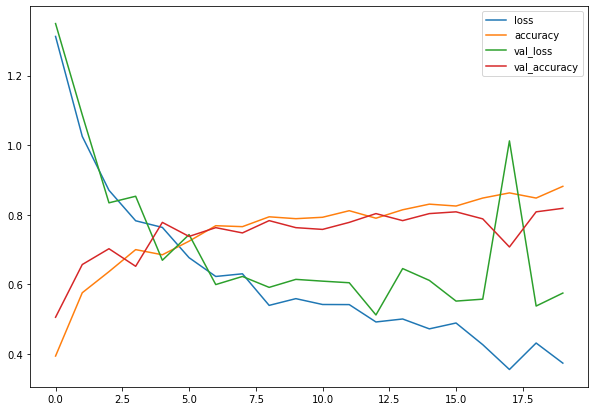

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [ ]:
from keras.preprocessing import image

In [ ]:
model = load_model('model.h5')

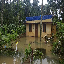

In [ ]:
img = image.load_img("/content/dataset/dataset/test_set/Flood/1015.jpg", target_size = (64, 64))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

array([2])

In [ ]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Flood', dtype='<U5')